## TS10 - Funciones de excitación no disipativas

#### Franco Ruggiero

In [5]:
import sympy as sp
from pytc2.sintesis_dipolo import foster
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.sintesis_dipolo import cauer_LC
from pytc2.dibujar import dibujar_cauer_LC

from schemdraw import Drawing
from pytc2.remociones import remover_polo_dc, remover_polo_jw
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from IPython.display import display,  Markdown

Síntesis de funciones de excitación
1) Sea la función:

# <center>$Z(s) = \frac{(s^2+3)(s^2+1)}{s(s^2+2)}$<center>

Se pide hallar la topología circuital y los valores de los componentes para:

- a) Síntesis de $Z_{(s)}$
 mediante el método de Foster en su versión  "paralelo" o "derivación".

- b) Idem a) mediante Cauer 1 y 2.

> <img src="1_a1.jpg" style="width:700px ; height:900px">
> <img src="1_a2'.jpg" style="width:700px ; height:500px">
> <img src="1b1.jpg" style="width:700px ; height:600px">
> <img src="1b2.jpg" style="width:700px ; height:600px">


<IPython.core.display.Math object>

#### Foster derivacion

<IPython.core.display.Math object>

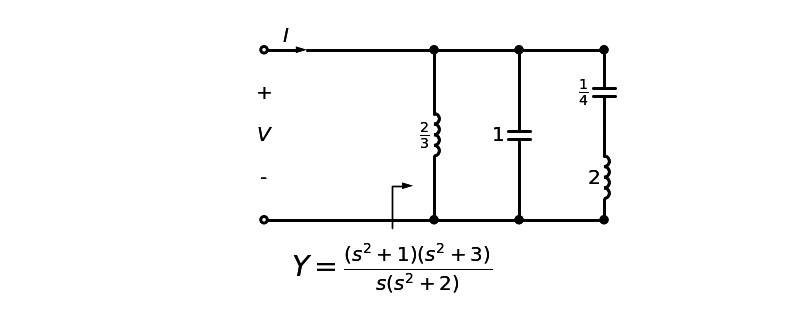

#### Cauer remociones en infinito

<IPython.core.display.Math object>

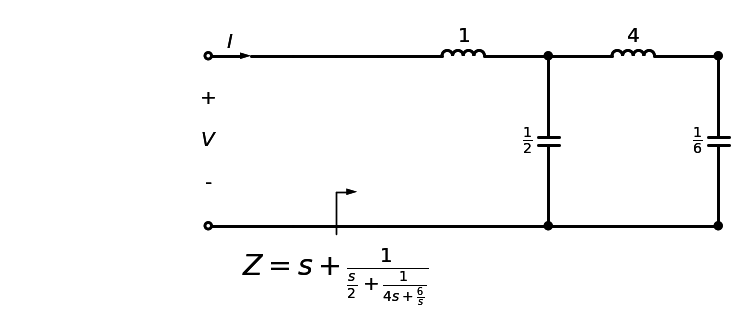

#### Cauer remociones en DC

<IPython.core.display.Math object>

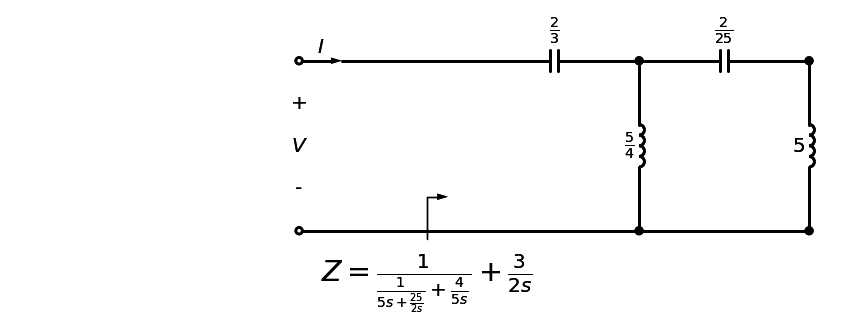

In [6]:

########################################################################################
#
#   Resolucion simbolica
#
########################################################################################

s = sp.symbols('s ', complex=True)

FF = (s**2 + 3)*(s**2 + 1)/(s*(s**2 + 2))

print_latex(a_equal_b_latex_s('F(s)', FF))


########################################################################################
#
#   Foster
#
########################################################################################

k0, koo, ki_wi, _, FF_foster = foster(FF)

print_subtitle('Foster derivacion')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y(s)=F(s)', FF)[1:-1], FF_foster ))

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_derivacion(k0, koo, ki_wi, y_exc = FF)


########################################################################################
#
#   cauer
#
########################################################################################

print_subtitle('Cauer remociones en infinito')

# Implementaremos FF mediante Cauer 1 o remociones continuas en infinito
koo, F_cauer_oo, rem = cauer_LC(FF, remover_en_inf=True)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('F(s)', FF)[1:-1], F_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(koo, z_exc = F_cauer_oo)

print_subtitle('Cauer remociones en DC')

# Implementaremos F mediante Cauer 2 o remociones continuas en cero
k0, F_cauer_0, rem = cauer_LC(FF, remover_en_inf=False)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('F(s)', FF)[1:-1], F_cauer_0 ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(k0, z_exc = F_cauer_0)

2) Sea 


# <center>$Y(s)=\frac{3s(s^2+\frac{7}{3})}{(s^2+2)(s^2+5)}$<center>

Obtenga los valores de los componentes de la siguiente red sabiendo que L2 y C2 resuenan a 1 r/s.

  <center><img src="img1.png" style="width:500px ; height:350px"><center>

> <img src="2_1.jpg" style="width:700px ; height:900px">
> <img src="2_2.jpg" style="width:700px ; height:900px">

In [11]:
#############################################################
#
#  Resolución simbólica
#
#############################################################

s = sp.symbols('s ', complex=True)

YY = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)

# Red ejemplo 1
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 YY, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, 'C', 'C1')

d = dibujar_tanque_derivacion(d, 'L2', 'C2')

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, 'L3', 'C3')

display(d)


# Restricción circuital: L2*C2 = 1 r/s
# remoción parcial en DC de 1/YY

omega_L2C2 = 1

Z2, Zc1 = remover_polo_dc(1/YY, omega_zero = omega_L2C2 )

# Yc1 es la admitancia removida
# extraigo C1
C1 = 1/(s*Zc1)

print_latex(a_equal_b_latex_s('Z_1(s) = \\frac{k^p_0}{s}', Zc1))
print_latex(a_equal_b_latex_s('Z_2(s)', Z2))



Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )

print_latex(a_equal_b_latex_s('Y_3(s)', Yt2))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))



# quedaría solo un tanque en Y4, no especifico omega.
Y6, Yt3, L3, C3 = remover_polo_jw(Y4, isImpedance = False)

print_latex(a_equal_b_latex_s('Y_5(s)', Yt3))
print_latex(a_equal_b_latex_s('Y_6(s)', Y6))



# Dibujamos la red resultante:

d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 YY, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, 'C', C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, L3, C3)

display(d)

TypeError: 'str' object is not callable